In [161]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt

In [163]:
# Load the dataset (assuming it's a CSV file)
df = pd.read_csv(r"C:\Users\Vaishali Senthil\OneDrive\Desktop\python project.csv")

In [165]:
# Set the 'year' column as the index
df.set_index('year', inplace=True)

In [167]:
# Define the variables of interest
vars_of_interest = [
    ['FDI', 'capital expenditure'],
    ['FDI', 'revenue expenditure'],
    ['govt debt', 'FDI'],
    ['capital expenditure', 'FDI'],
    ['revenue expenditure', 'FDI'],
    ['capital expenditure', 'FDI'] , ['FDI', 'GDP'], ['GDP','FDI',] ]

In [183]:
# Create a function to perform Granger causality tests
def perform_granger_causality_tests_differenced(df, vars):
    df_subset = df[vars]
    df_differenced = df_subset.diff().dropna()
    gc_res = grangercausalitytests(df_differenced, 2)
    return gc_res
def perform_granger_causality_tests(df, vars):
    df_subset = df[vars]
    gc_res = grangercausalitytests(df_subset, 2)
    return gc_res


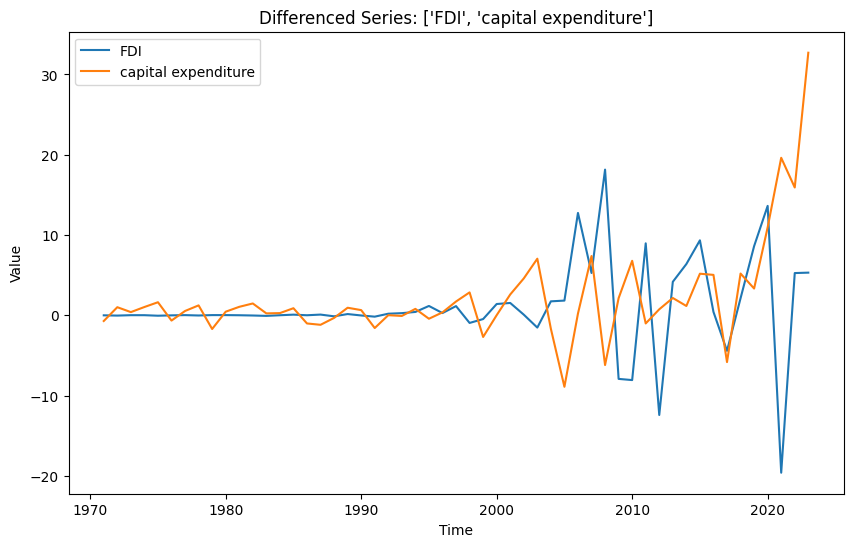

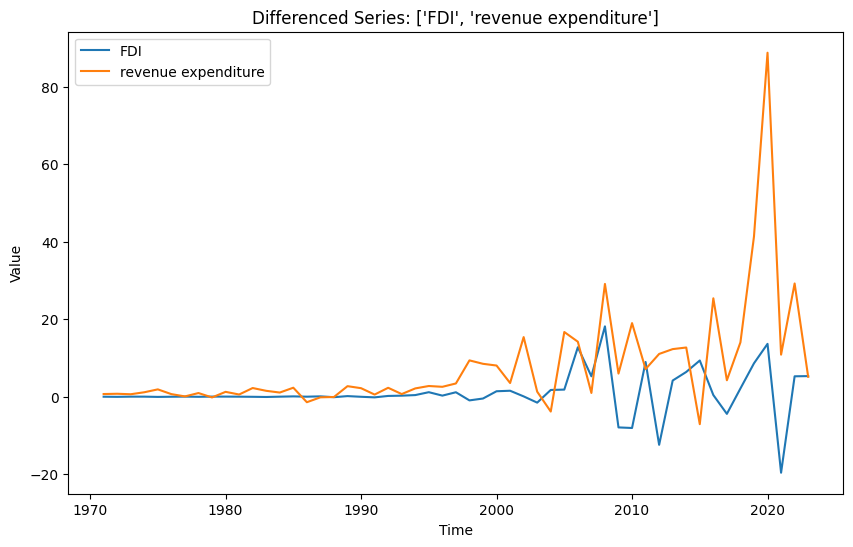

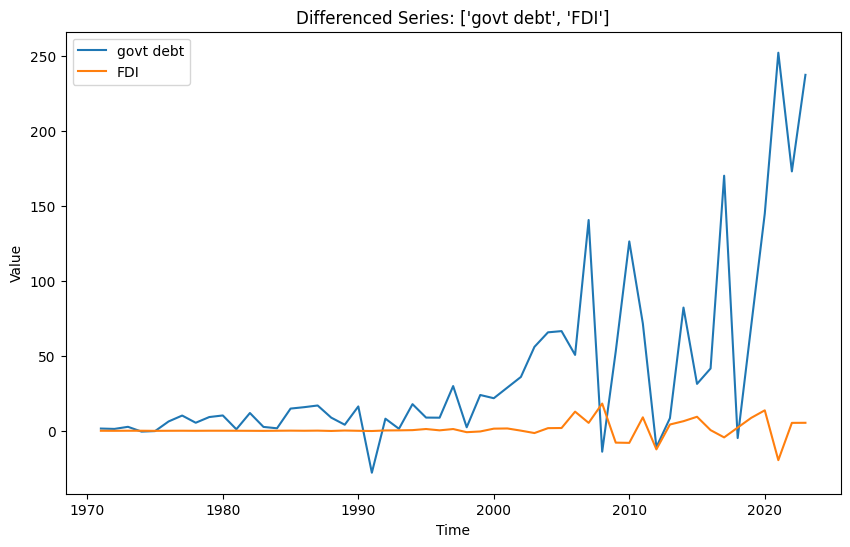

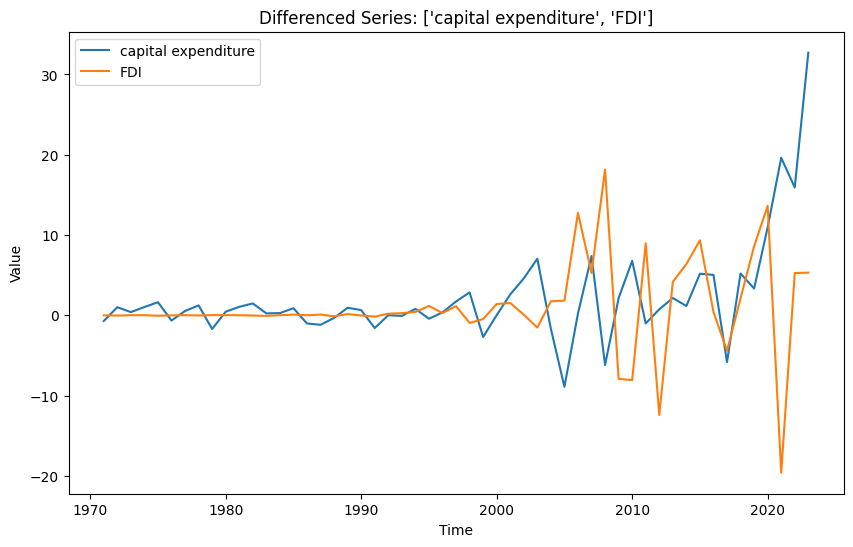

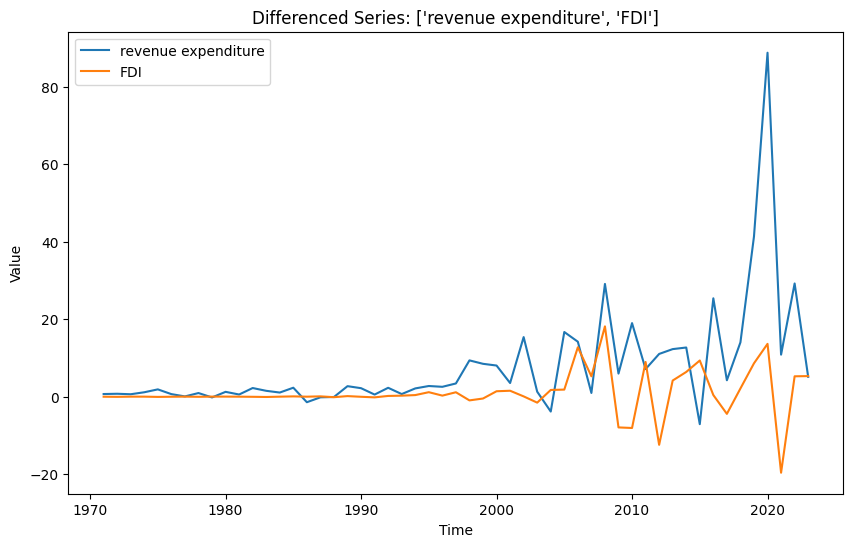

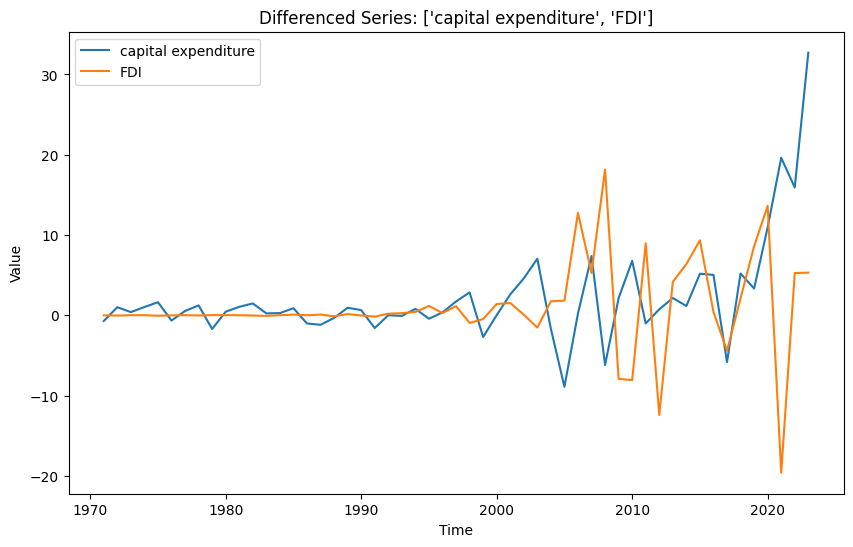

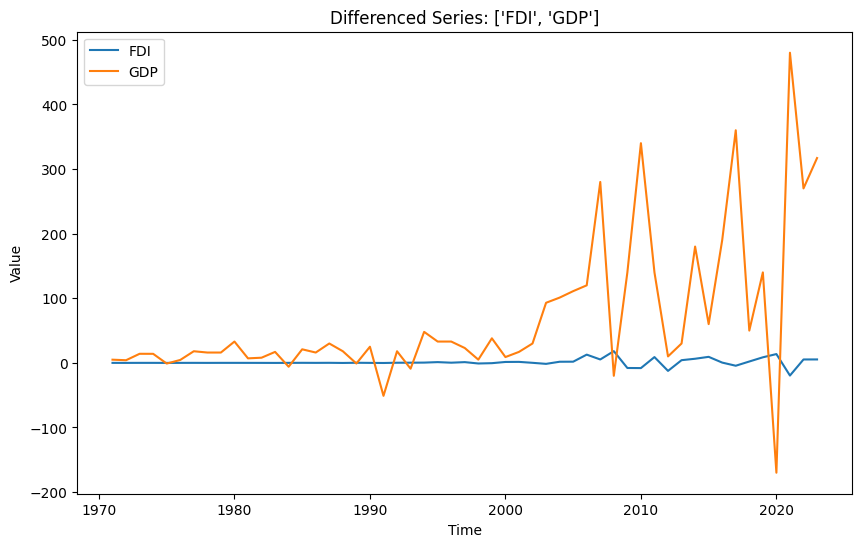

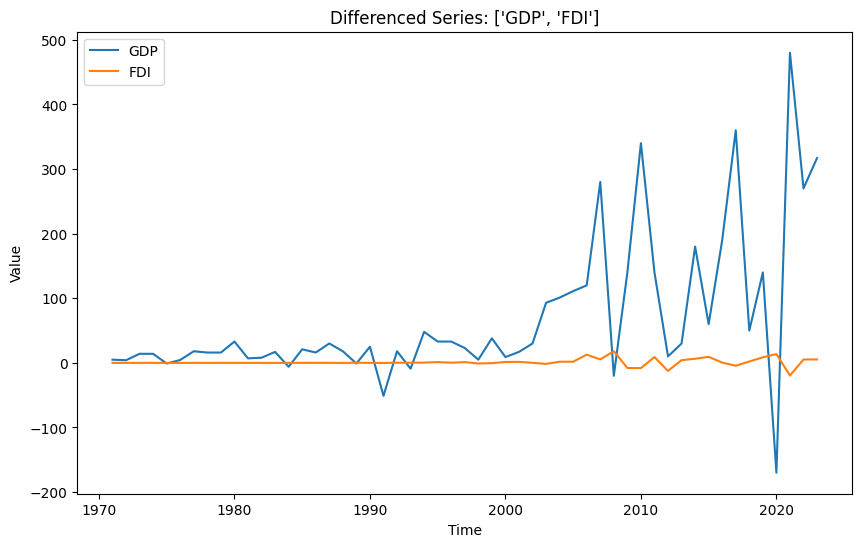

In [185]:
# Plot the differenced series for each set of variables
for vars in vars_of_interest:
    df_subset = df[vars]
    df_differenced = df_subset.diff().dropna()
    plt.figure(figsize=(10, 6))
    plt.plot(df_differenced)
    plt.title(f"Differenced Series: {vars}")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.legend(vars)
    plt.show()

In [186]:
results_table = []  # Initialize the results table here
for vars in vars_of_interest:
    gc_res = perform_granger_causality_tests(df, vars)
    for lag, res in gc_res.items():
        p_value = res[0]['ssr_ftest'][1]
        if p_value < 0.05:
            granger_causality = 'Yes'
        else:
            granger_causality = 'No'
        results_table.append({
            'Variables': ' -> '.join(vars),
            'Lag': lag,
            'p-value': p_value,
            'Granger Causality': granger_causality
        })

df_results = pd.DataFrame(results_table)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.1125  , p=0.0838  , df_denom=50, df_num=1
ssr based chi2 test:   chi2=3.2993  , p=0.0693  , df=1
likelihood ratio test: chi2=3.2006  , p=0.0736  , df=1
parameter F test:         F=3.1125  , p=0.0838  , df_denom=50, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.3631  , p=0.2658  , df_denom=47, df_num=2
ssr based chi2 test:   chi2=3.0161  , p=0.2213  , df=2
likelihood ratio test: chi2=2.9319  , p=0.2309  , df=2
parameter F test:         F=1.3631  , p=0.2658  , df_denom=47, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.6469  , p=0.0359  , df_denom=50, df_num=1
ssr based chi2 test:   chi2=4.9257  , p=0.0265  , df=1
likelihood ratio test: chi2=4.7101  , p=0.0300  , df=1
parameter F test:         F=4.6469  , p=0.0359  , df_denom=50, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.8156  , p=0.0055  , df_d

In [187]:
print(" granger causality ")
df_results

 granger causality 


,Variables,Lag,p-value,Granger Causality
0,FDI -> capital expenditure,1,8.380149e-02,No
1,FDI -> capital expenditure,2,2.658056e-01,No
2,FDI -> revenue expenditure,1,3.594750e-02,Yes
3,FDI -> revenue expenditure,2,5.537204e-03,Yes
4,govt debt -> FDI,1,5.701765e-01,No
5,govt debt -> FDI,2,5.178619e-01,No
6,capital expenditure -> FDI,1,5.496599e-01,No
7,capital expenditure -> FDI,2,2.025355e-01,No
8,revenue expenditure -> FDI,1,1.464526e-01,No
9,revenue expenditure -> FDI,2,3.019295e-01,No


In [188]:
results_table2 = []  # Initialize the results table here
for vars in vars_of_interest:
    gc_res = perform_granger_causality_tests_differenced(df, vars)
    for lag, res in gc_res.items():
        p_value = res[0]['ssr_ftest'][1]
        if p_value < 0.05:
            granger_causality = 'Yes'
        else:
            granger_causality = 'No'
        results_table2.append({
            'Variables': ' -> '.join(vars),
            'Lag': lag,
            'p-value': p_value,
            'Granger Causality': granger_causality
        })

df_results2 = pd.DataFrame(results_table2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0487  , p=0.8263  , df_denom=49, df_num=1
ssr based chi2 test:   chi2=0.0517  , p=0.8202  , df=1
likelihood ratio test: chi2=0.0516  , p=0.8202  , df=1
parameter F test:         F=0.0487  , p=0.8263  , df_denom=49, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4685  , p=0.6289  , df_denom=46, df_num=2
ssr based chi2 test:   chi2=1.0389  , p=0.5948  , df=2
likelihood ratio test: chi2=1.0285  , p=0.5979  , df=2
parameter F test:         F=0.4685  , p=0.6289  , df_denom=46, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7745  , p=0.1890  , df_denom=49, df_num=1
ssr based chi2 test:   chi2=1.8831  , p=0.1700  , df=1
likelihood ratio test: chi2=1.8498  , p=0.1738  , df=1
parameter F test:         F=1.7745  , p=0.1890  , df_denom=49, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6643  , p=0.5195  , df_d

In [193]:
print("differenced causality testing")
df_results2 

differenced causality testing


,Variables,Lag,p-value,Granger Causality
0,FDI -> capital expenditure,1,0.826282,No
1,FDI -> capital expenditure,2,0.628866,No
2,FDI -> revenue expenditure,1,0.188994,No
3,FDI -> revenue expenditure,2,0.519503,No
4,govt debt -> FDI,1,0.032148,Yes
5,govt debt -> FDI,2,0.176304,No
6,capital expenditure -> FDI,1,0.030504,Yes
7,capital expenditure -> FDI,2,0.128267,No
8,revenue expenditure -> FDI,1,0.702715,No
9,revenue expenditure -> FDI,2,0.726390,No
